**LEVEL 3**
  
  1. TASK 1
  2. TASK 2
  3. TASK 3

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
data = pd.read_csv("Dataset .csv")

**Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.**

**Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.**

In [ ]:
features = data.drop(["Restaurant ID", "Restaurant Name","Address", "City", "Locality", "Locality Verbose","Cuisines", "Currency","Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu", "Rating color", "Rating text", "Votes"], axis=1)  # Remove unnecessary columns
target_variable = data["Aggregate rating"]

X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)


In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree:")
print("R-squared:", r2_score(y_test, y_pred_dt))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))

Decision Tree:
R-squared: 1.0
Mean Squared Error: 9.472657023495947e-29


In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print("R-squared:", r2_score(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))

Random Forest:
R-squared: 0.9999999997700961
Mean Squared Error: 5.232862375718366e-10


**Analyze the relationship between the type of
cuisine and the restaurant's rating.**

In [ ]:
cuisine_ratings = data.groupby("Cuisines")["Aggregate rating"].agg(
    ["mean", "median", "max", "min", "count"]
)

cuisine_ratings = cuisine_ratings.sort_values(by="mean", ascending=False)
print(cuisine_ratings.head())


                         mean  median  max  min  count
Cuisines                                              
Italian, Deli             4.9     4.9  4.9  4.9      1
Hawaiian, Seafood         4.9     4.9  4.9  4.9      1
American, Sandwich, Tea   4.9     4.9  4.9  4.9      1
Continental, Indian       4.9     4.9  4.9  4.9      1
European, Asian, Indian   4.9     4.9  4.9  4.9      1


**Identify the most popular cuisines among
customers based on the number of votes.**

In [ ]:
top_cuisines = data.groupby("Cuisines")["Aggregate rating"].mean().nlargest(10)
print(top_cuisines)


Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
BBQ, Breakfast, Southern        4.9
Burger, Bar Food, Steak         4.9
Continental, Indian             4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
Name: Aggregate rating, dtype: float64


In [ ]:
data = data[data["Votes"].notnull()]
data["Votes"] = pd.to_numeric(data["Votes"], errors="coerce")
data.dropna(subset=["Votes"], inplace=True)

cuisine_votes = data.groupby("Cuisines")["Votes"].sum()

top_cuisines = cuisine_votes.nlargest(10)

print("Top 10 Cuisines by Votes:")
print(top_cuisines)

Top 10 Cuisines by Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


**Determine if there are any specific cuisines
that tend to receive higher ratings.**

In [ ]:
cuisine_ratings = data.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)
print(cuisine_ratings.head(50))


Cuisines
Italian, Deli                                                  4.900000
Hawaiian, Seafood                                              4.900000
American, Sandwich, Tea                                        4.900000
Continental, Indian                                            4.900000
European, Asian, Indian                                        4.900000
European, Contemporary                                         4.900000
European, German                                               4.900000
BBQ, Breakfast, Southern                                       4.900000
American, Coffee and Tea                                       4.900000
Sunda, Indonesian                                              4.900000
American, Burger, Grill                                        4.900000
Mughlai, Lucknowi                                              4.900000
Mexican, American, Healthy Food                                4.900000
American, Caribbean, Seafood                           

**Compare the average ratings of different cuisines
or cities using appropriate visualizations.**

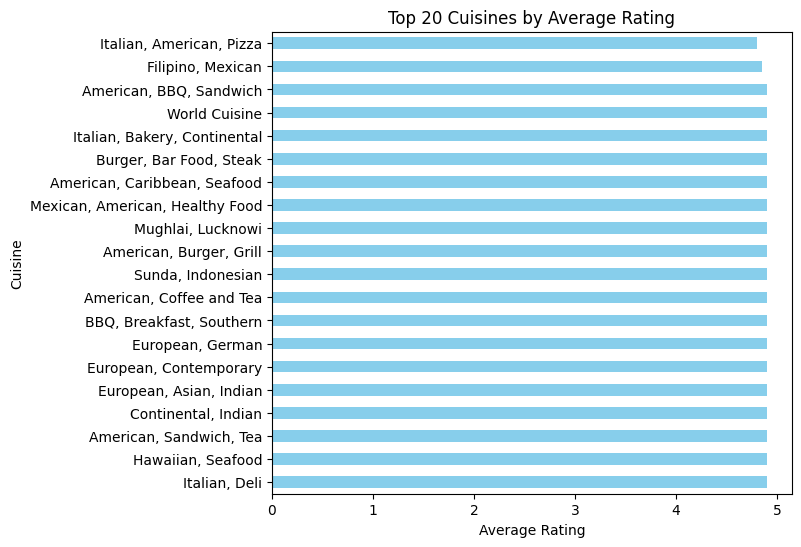

In [ ]:
cuisine_ratings = data.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)
top_20_cuisines = cuisine_ratings.head(20)

plt.figure(figsize=(10, 6))
top_20_cuisines.plot(kind="barh", color="skyblue")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.title("Top 20 Cuisines by Average Rating")
plt.subplots_adjust(left=0.38)
plt.show()

**Visualize the relationship between various
features and the target variable to gain insights.**

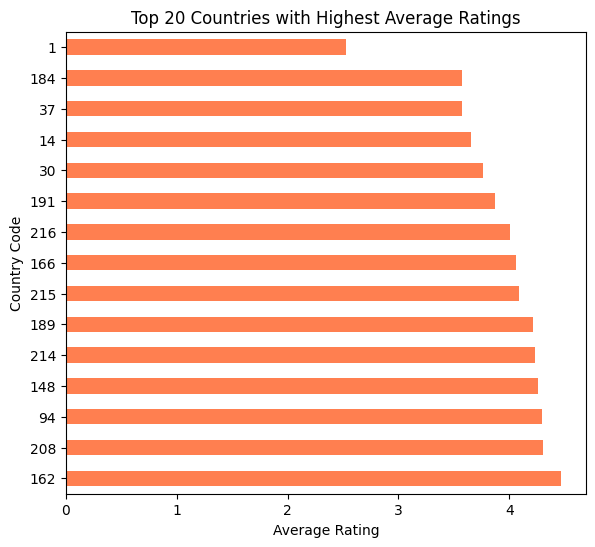

In [ ]:
country_counts = data["Country Code"].value_counts().head(20)
top_20_ratings = (
    data.groupby("Country Code")["Aggregate rating"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(10, 6))
top_20_ratings.plot(kind="barh", color="coral")
plt.xlabel("Average Rating")
plt.ylabel("Country Code")
plt.title("Top 20 Countries with Highest Average Ratings")
plt.subplots_adjust(left=0.38)
plt.show()